In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/iris.csv')

d = {'Setosa': 0,
     'Versicolor': 1,
     'Virginica': 2}
df['variety'] = df['variety'].map(d)

X = df.iloc[:, 1:5].values
y = df['variety'].values

indices = np.arange(X.shape[0])
rng = np.random.RandomState(123)
permuted_indices = rng.permutation(indices)

train_size, valid_size = int(0.65*X.shape[0]), int(0.15*X.shape[0])
test_size = X.shape[0] - (train_size + valid_size)
train_ind = permuted_indices[:train_size]
valid_ind = permuted_indices[train_size:(train_size + valid_size)]
test_ind = permuted_indices[(train_size + valid_size):]
X_train, y_train = X[train_ind], y[train_ind]
X_valid, y_valid = X[valid_ind], y[valid_ind]
X_test, y_test = X[test_ind], y[test_ind]

print(f'X_train.shape: {X_train.shape}')
print(f'X_valid.shape: {X_valid.shape}')
print(f'X_test.shape: {X_test.shape}')

X_train.shape: (97, 4)
X_valid.shape: (22, 4)
X_test.shape: (31, 4)


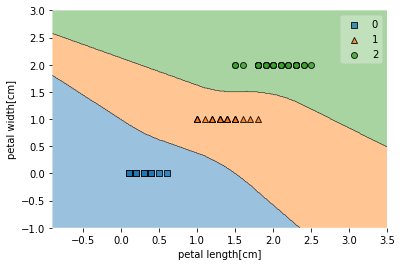

In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train[:, 2:], y_train)
plot_decision_regions(X_train[:, 2:], y_train, knn_model)
plt.xlabel('petal length[cm]')
plt.ylabel('petal width[cm]')
plt.show()